# **STATISTICAL AND MACHINE LEARNING: Group Project**



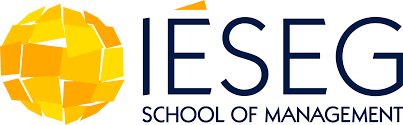

> **Fabrizio Lucero** [LinkedIn](https://www.linkedin.com/in/fabrizio-lucero/)
<br>
> **Yahswanth Thonukunuru** [LinkedIn](https://www.linkedin.com/in/yashwanth-thonukunuru-0b5253166/)
<br>
> **Eleftheria Zygomitrou** [LinkedIn](https://www.linkedin.com/in/eleftheria-zygomitrou/)

The purpose of this notebook is to have a better understanding of our variables and exploring their 'weights'

In [1]:
# Libraries 
#preprocessing data
import pandas as pd
import numpy as np
import datetime as dt
import math 
import string
from pandas import DataFrame
from numpy import array
from matplotlib import pyplot
from collections import Counter
from pandas import read_csv

# visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as snsb

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import sys

import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing datasets
driving_coupon_train = read_csv("driving_coupon_train.csv")
driving_coupon_test = read_csv("driving_coupon_test.csv")

### Descriptive of each variable

In [3]:
driving_coupon_train.columns

Index(['client_id', 'destination', 'passanger', 'weather', 'temperature',
       'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus',
       'has_children', 'education', 'occupation', 'income', 'car', 'Bar',
       'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [61]:
driving_coupon_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             6667 non-null   int64  
 1   destination           6318 non-null   object 
 2   passanger             6341 non-null   object 
 3   weather               6302 non-null   object 
 4   temperature           6333 non-null   float64
 5   time                  6351 non-null   object 
 6   coupon                6367 non-null   object 
 7   expiration            6309 non-null   object 
 8   gender                6317 non-null   object 
 9   age                   6346 non-null   object 
 10  maritalStatus         6379 non-null   object 
 11  has_children          6343 non-null   float64
 12  education             6332 non-null   object 
 13  occupation            6318 non-null   object 
 14  income                6320 non-null   object 
 15  car                  

#### destination

In [4]:
driving_coupon_train.groupby(['destination'])['Y'].sum()/driving_coupon_train.groupby(['destination'])['Y'].count()

destination
Home               0.500000
No Urgent Place    0.634405
Work               0.498101
Name: Y, dtype: float64

#### passanger

In [5]:
driving_coupon_train.groupby(['passanger'])['Y'].sum()/driving_coupon_train.groupby(['passanger'])['Y'].count()

passanger
Alone        0.518669
Friend(s)    0.678905
Kid(s)       0.486653
Partner      0.595281
Name: Y, dtype: float64

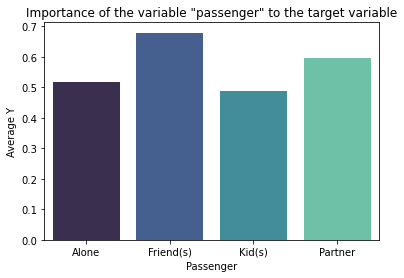

In [73]:
# calculate the values
values = driving_coupon_train.groupby(['passanger'])['Y'].sum()/driving_coupon_train.groupby(['passanger'])['Y'].count()

# create bar plot
sns.barplot(x=values.index, y=values, palette=sns.color_palette("mako", len(values.index)))

# # rotate x-axis labels
# plt.xticks(rotation=60)

# set labels and title
plt.xlabel('Passenger')
plt.ylabel('Average Y')
plt.title('Importance of the variable "passenger" to the target variable')

# display the plot
plt.show()


#### weather

In [6]:
driving_coupon_train.groupby(['weather'])['Y'].sum()/driving_coupon_train.groupby(['weather'])['Y'].count()

weather
Rainy    0.444811
Snowy    0.474692
Sunny    0.592869
Name: Y, dtype: float64

#### temperature

In [7]:
driving_coupon_train.groupby(['temperature'])['Y'].sum()/driving_coupon_train.groupby(['temperature'])['Y'].count()

temperature
30.0    0.528919
55.0    0.529843
80.0    0.595046
Name: Y, dtype: float64

#### time

In [8]:
driving_coupon_train.groupby(['time'])['Y'].sum()/driving_coupon_train.groupby(['time'])['Y'].count()

time
10AM    0.604949
10PM    0.502444
2PM     0.653649
6PM     0.580100
7AM     0.494637
Name: Y, dtype: float64

#### coupon

In [9]:
driving_coupon_train.groupby(['coupon'])['Y'].sum()/driving_coupon_train.groupby(['coupon'])['Y'].count()

coupon
Bar                      0.394118
Carry out & Take away    0.730927
Coffee House             0.501790
Restaurant(20-50)        0.423025
Restaurant(<20)          0.705470
Name: Y, dtype: float64

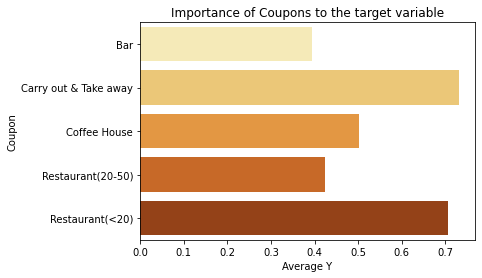

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the values
values = driving_coupon_train.groupby(['coupon'])['Y'].sum() / driving_coupon_train.groupby(['coupon'])['Y'].count()

# set custom color palette
custom_palette = sns.color_palette("YlOrBr", len(values.index))

# create bar plot with custom palette
sns.barplot(x=values, y=values.index, palette=custom_palette)

# set labels and title
plt.ylabel('Coupon')
plt.xlabel('Average Y')
plt.title('Importance of Coupons to the target variable')

# display the plot
plt.show()


#### expiration

In [10]:
driving_coupon_train.groupby(['expiration'])['Y'].sum()/driving_coupon_train.groupby(['expiration'])['Y'].count()

expiration
1d    0.620378
2h    0.493492
Name: Y, dtype: float64

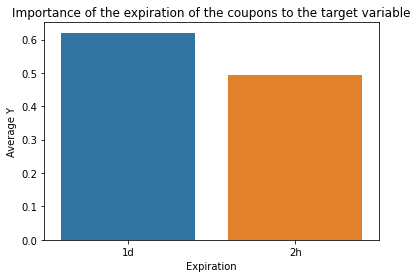

In [54]:
# calculate the values
values = driving_coupon_train.groupby(['expiration'])['Y'].sum()/driving_coupon_train.groupby(['expiration'])['Y'].count()

# create bar plot
sns.barplot(x=values.index, y=values)

# set labels and title
plt.xlabel('Expiration')
plt.ylabel('Average Y')
plt.title('Importance of the expiration of the coupons to the target variable')

# display the plot
plt.show()

#### gender

In [11]:
driving_coupon_train.groupby(['gender'])['Y'].sum()/driving_coupon_train.groupby(['gender'])['Y'].count()

gender
Female    0.542123
Male      0.595391
Name: Y, dtype: float64

#### age

In [12]:
driving_coupon_train.groupby(['age'])['Y'].sum()/driving_coupon_train.groupby(['age'])['Y'].count()

age
21         0.580692
26         0.586570
31         0.539652
36         0.545455
41         0.558394
46         0.586207
50plus     0.522272
below21    0.661597
Name: Y, dtype: float64

#### maritalStatus

In [13]:
driving_coupon_train.groupby(['maritalStatus'])['Y'].sum()/driving_coupon_train.groupby(['maritalStatus'])['Y'].count()

maritalStatus
Divorced             0.575188
Married partner      0.527745
Single               0.605729
Unmarried partner    0.559894
Widowed              0.478873
Name: Y, dtype: float64

#### has_children

In [14]:
driving_coupon_train.groupby(['has_children'])['Y'].sum()/driving_coupon_train.groupby(['has_children'])['Y'].count()

has_children
0.0    0.585650
1.0    0.531177
Name: Y, dtype: float64

#### education

In [15]:
driving_coupon_train.groupby(['education'])['Y'].sum()/driving_coupon_train.groupby(['education'])['Y'].count()

education
Associates degree                         0.532399
Bachelors degree                          0.540225
Graduate degree (Masters or Doctorate)    0.515323
High School Graduate                      0.578475
Some High School                          0.651163
Some college - no degree                  0.608495
Name: Y, dtype: float64

#### occupation

In [16]:
driving_coupon_train.groupby(['occupation'])['Y'].sum()/driving_coupon_train.groupby(['occupation'])['Y'].count()

occupation
Architecture & Engineering                   0.582524
Arts Design Entertainment Sports & Media     0.515823
Building & Grounds Cleaning & Maintenance    0.588235
Business & Financial                         0.543919
Community & Social Services                  0.472000
Computer & Mathematical                      0.537911
Construction & Extraction                    0.675325
Education&Training&Library                   0.517857
Farming Fishing & Forestry                   0.541667
Food Preparation & Serving Related           0.573248
Healthcare Practitioners & Technical         0.656000
Healthcare Support                           0.689922
Installation Maintenance & Repair            0.573529
Legal                                        0.446429
Life Physical Social Science                 0.621622
Management                                   0.588542
Office & Administrative Support              0.577713
Personal Care & Service                      0.529412
Production Occupa

#### income

In [17]:
driving_coupon_train.groupby(['income'])['Y'].sum()/driving_coupon_train.groupby(['income'])['Y'].count()

income
$100000 or More     0.577726
$12500 - $24999     0.579176
$25000 - $37499     0.593970
$37500 - $49999     0.549042
$50000 - $62499     0.609337
$62500 - $74999     0.503513
$75000 - $87499     0.465438
$87500 - $99999     0.513514
Less than $12500    0.594393
Name: Y, dtype: float64

#### carr

In [18]:
driving_coupon_train.groupby(['car'])['Y'].sum()/driving_coupon_train.groupby(['car'])['Y'].count()

car
Car that is too old to install Onstar :D    0.777778
Mazda5                                      0.727273
Scooter and motorcycle                      0.555556
crossover                                   0.416667
do not drive                                0.416667
Name: Y, dtype: float64

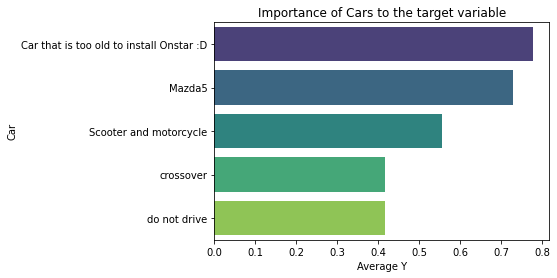

In [76]:
# calculate the values
values = driving_coupon_train.groupby(['car'])['Y'].sum()/driving_coupon_train.groupby(['car'])['Y'].count()

# set custom color palette
custom_palette = sns.color_palette("viridis", len(values.index))

# create bar plot with custom palette
sns.barplot(x=values, y=values.index, palette=custom_palette)

# set labels and title
plt.ylabel('Car')
plt.xlabel('Average Y')
plt.title('Importance of Cars to the target variable')

# display the plot
plt.show()


#### Bar

In [19]:
driving_coupon_train.groupby(['Bar'])['Y'].sum()/driving_coupon_train.groupby(['Bar'])['Y'].count()

Bar
1~3      0.609240
4~8      0.609756
gt8      0.544944
less1    0.565662
never    0.528161
Name: Y, dtype: float64

#### CoffeeHouse

In [20]:
driving_coupon_train.groupby(['CoffeeHouse'])['Y'].sum()/driving_coupon_train.groupby(['CoffeeHouse'])['Y'].count()

CoffeeHouse
1~3      0.647468
4~8      0.640312
gt8      0.584104
less1    0.542120
never    0.455446
Name: Y, dtype: float64

#### CarryAway

In [21]:
driving_coupon_train.groupby(['CarryAway'])['Y'].sum()/driving_coupon_train.groupby(['CarryAway'])['Y'].count()

CarryAway
1~3      0.564523
4~8      0.585040
gt8      0.559449
less1    0.509554
never    0.512195
Name: Y, dtype: float64

#### RestaurantLessThan20

In [22]:
driving_coupon_train.groupby(['RestaurantLessThan20'])['Y'].sum()/driving_coupon_train.groupby(['RestaurantLessThan20'])['Y'].count()

RestaurantLessThan20
1~3      0.558456
4~8      0.576490
gt8      0.612557
less1    0.526912
never    0.473684
Name: Y, dtype: float64

#### Restaurant20To50

In [23]:
driving_coupon_train.groupby(['Restaurant20To50'])['Y'].sum()/driving_coupon_train.groupby(['Restaurant20To50'])['Y'].count()

Restaurant20To50
1~3      0.597162
4~8      0.625000
gt8      0.669118
less1    0.554108
never    0.506375
Name: Y, dtype: float64

#### toCoupon_GEQ5min

In [24]:
driving_coupon_train.groupby(['toCoupon_GEQ5min'])['Y'].sum()/driving_coupon_train.groupby(['toCoupon_GEQ5min'])['Y'].count()

toCoupon_GEQ5min
1.0    0.564702
Name: Y, dtype: float64

In [25]:
driving_coupon_train['toCoupon_GEQ5min'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6667 entries, 0 to 6666
Series name: toCoupon_GEQ5min
Non-Null Count  Dtype  
--------------  -----  
6329 non-null   float64
dtypes: float64(1)
memory usage: 52.2 KB


In [26]:
driving_coupon_train['toCoupon_GEQ5min'].isnull().sum()

338

#### toCoupon_GEQ15min

In [27]:
driving_coupon_train.groupby(['toCoupon_GEQ15min'])['Y'].sum()/driving_coupon_train.groupby(['toCoupon_GEQ15min'])['Y'].count()

toCoupon_GEQ15min
0.0    0.611685
1.0    0.525663
Name: Y, dtype: float64

#### toCoupon_GEQ25min

In [28]:
driving_coupon_train.groupby(['toCoupon_GEQ25min'])['Y'].sum()/driving_coupon_train.groupby(['toCoupon_GEQ25min'])['Y'].count()

toCoupon_GEQ25min
0.0    0.584513
1.0    0.422627
Name: Y, dtype: float64

#### direction_same

In [29]:
driving_coupon_train.groupby(['direction_same'])['Y'].sum()/driving_coupon_train.groupby(['direction_same'])['Y'].count()

direction_same
0.0    0.564389
1.0    0.576616
Name: Y, dtype: float64

#### direction_opp

In [30]:
driving_coupon_train.groupby(['direction_opp'])['Y'].sum()/driving_coupon_train.groupby(['direction_opp'])['Y'].count()

direction_opp
0.0    0.575560
1.0    0.561064
Name: Y, dtype: float64